# K-Means Clustering: Theory and Implementation

> **"Clustering is the art of finding patterns in data without labels."**

## Learning Objectives
- Understand the K-Means algorithm and its mathematical foundation
- Implement K-Means from scratch using NumPy
- Learn about clustering evaluation metrics
- Master hyperparameter tuning and initialization methods
- Apply K-Means to real-world datasets


## 1. K-Means Algorithm

### Objective Function
Minimize the within-cluster sum of squares (WCSS):

**J = Σᵢ₌₁ᵏ Σₓ∈Cᵢ ||x - μᵢ||²**

Where:
- k: number of clusters
- Cᵢ: i-th cluster
- μᵢ: centroid of cluster i
- x: data point

### Algorithm Steps
1. **Initialize**: Choose k centroids randomly
2. **Assign**: Assign each point to nearest centroid
3. **Update**: Recalculate centroids as mean of assigned points
4. **Repeat**: Steps 2-3 until convergence


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
class KMeansFromScratch:
    """K-Means clustering implementation from scratch."""
    
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        
    def _initialize_centroids(self, X):
        """Initialize centroids using random sampling."""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features))
        
        for i in range(self.n_clusters):
            centroids[i] = X[np.random.choice(n_samples)]
        
        return centroids
    
    def _assign_clusters(self, X, centroids):
        """Assign each point to the nearest centroid."""
        n_samples = X.shape[0]
        labels = np.zeros(n_samples)
        
        for i in range(n_samples):
            distances = np.sqrt(np.sum((X[i] - centroids) ** 2, axis=1))
            labels[i] = np.argmin(distances)
        
        return labels.astype(int)
    
    def _update_centroids(self, X, labels):
        """Update centroids based on assigned points."""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If cluster is empty, keep the old centroid
                centroids[i] = self.centroids[i]
        
        return centroids
    
    def _compute_inertia(self, X, labels, centroids):
        """Compute within-cluster sum of squares (inertia)."""
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - centroids[i]) ** 2)
        return inertia
    
    def fit(self, X):
        """Fit K-Means clustering to data."""
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Store previous centroids for convergence check
            prev_centroids = self.centroids.copy()
            
            # Assign points to clusters
            self.labels_ = self._assign_clusters(X, self.centroids)
            
            # Update centroids
            self.centroids = self._update_centroids(X, self.labels_)
            
            # Check for convergence
            if np.allclose(prev_centroids, self.centroids):
                print(f"Converged after {iteration + 1} iterations")
                break
        
        return self
    
    def predict(self, X):
        """Predict cluster labels for new data."""
        if self.centroids is None:
            raise ValueError("Model must be fitted before making predictions")
        
        return self._assign_clusters(X, self.centroids)
    
    def fit_predict(self, X):
        """Fit the model and return cluster labels."""
        return self.fit(X).labels_

print("K-Means class defined successfully!")


K-Means class defined successfully!


Testing K-Means Implementation:
Converged after 4 iterations


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Our implementation inertia: 1251.73
Sklearn inertia: 1251.35
Difference: 0.378842


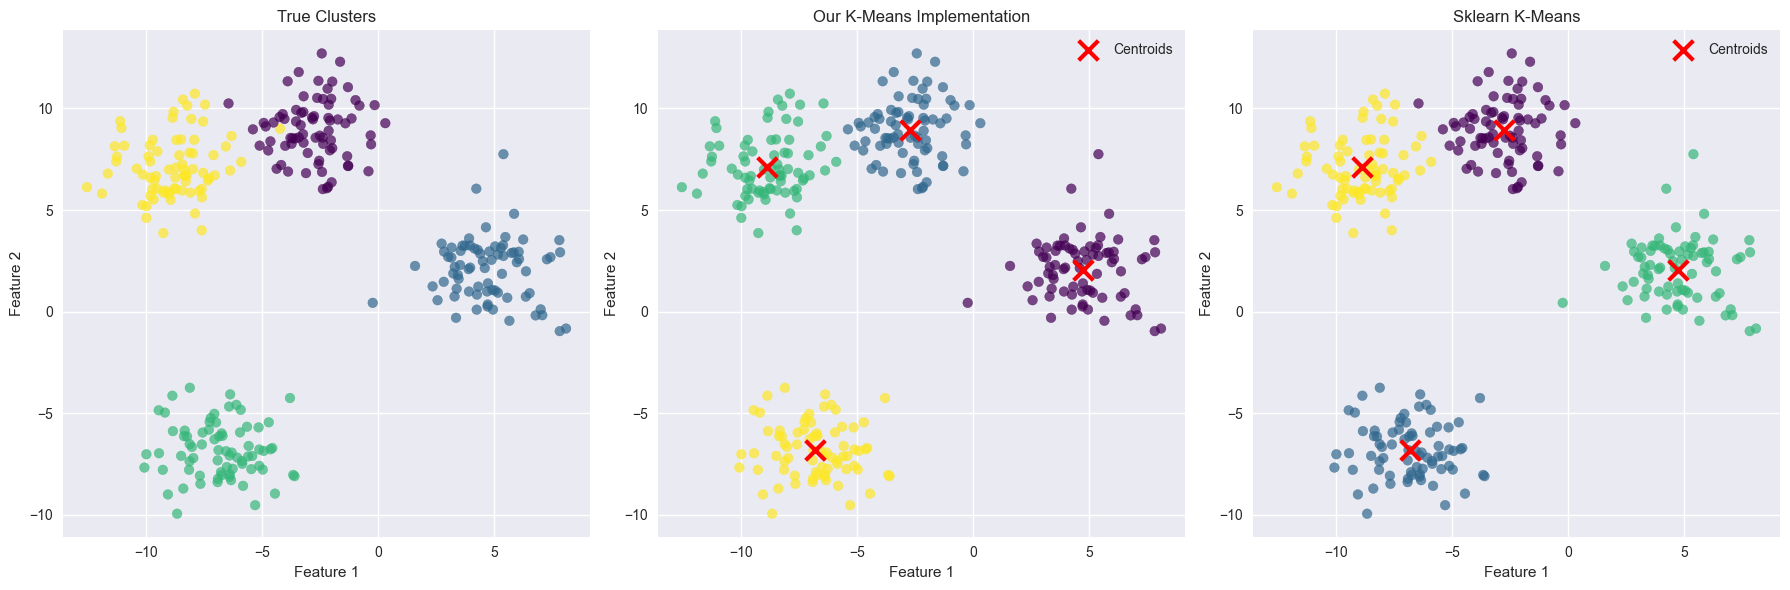

In [3]:
# Test our K-Means implementation
print("Testing K-Means Implementation:")
print("=" * 50)

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, 
                       random_state=42, cluster_std=1.5)

# Apply K-Means
kmeans = KMeansFromScratch(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Compare with sklearn
sklearn_kmeans = KMeans(n_clusters=4, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X)

# Calculate inertia
inertia = kmeans._compute_inertia(X, labels, kmeans.centroids)
sklearn_inertia = sklearn_kmeans.inertia_

print(f"Our implementation inertia: {inertia:.2f}")
print(f"Sklearn inertia: {sklearn_inertia:.2f}")
print(f"Difference: {abs(inertia - sklearn_inertia):.6f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# True clusters
scatter = axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
axes[0].set_title('True Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Our implementation
scatter = axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].set_title('Our K-Means Implementation')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

# Sklearn implementation
scatter = axes[2].scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis', alpha=0.7)
axes[2].scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], 
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[2].set_title('Sklearn K-Means')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()

plt.tight_layout()
plt.show()
